<div style="background-color:AliceBlue; padding:10px; border-left:5px solid #6495ed; margin-bottom:10px;">
  <h4 style="font-size:13px;">📦 <strong>Importar Librerias</strong></h4>
</div>

In [1]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from mlflow.models.signature import infer_signature

<div style="background-color:AliceBlue; padding:10px; border-left:5px solid #6495ed; margin-bottom:10px;">
  <h4 style="font-size:13px;">🌸 <strong>Importar DataSet Iris</strong></h4>
</div>

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

df_0_1 = df[df["target"].isin([0, 1])] # 0:setosa 1:versicolor

df_virginica = df[df["target"] == 2]
df_2_0 = df_virginica.sample( n = 25 )
df_2_1 = df_virginica.drop(df_2_0.index).sample( n = 25 )

df_iris = pd.concat([df_0_1, df_2_0, df_2_1], ignore_index=True)

# 4. Separar variables
X = df_iris[iris.feature_names]
y = df_iris["target"]

<div style="background-color:AliceBlue; padding:10px; border-left:5px solid #f4a460; margin-bottom:10px;">
  <h4 style="font-size:13px;">✂️ <strong>Divide en entrenamiento y prueba</strong></h4>
</div>

In [3]:
procen_test = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = procen_test, random_state = 42)

<div style="background-color:AliceBlue; padding:10px; border-left:5px solid #2e8b57; margin-bottom:10px;">
  <h4 style="font-size:13px;">🤖 <strong>Entrenamiento del Modelo</strong></h4>
</div>

In [4]:
try:
    #mlflow.set_tracking_uri("www.localhost:5000")
    mlflow.set_experiment("Iris_Classifier")
except Exception as ex:
    print(f"MlFlow: Se produjo el siguiente error : {ex} ")

try:
    with mlflow.start_run():
        # Entrena modelo
        clf = LogisticRegression(max_iter=200)
        clf.fit(X_train, y_train)

        # Predice
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        # Loguea parámetros, métricas y modelo
        mlflow.log_param("max_depth", 3)
        mlflow.log_metric("accuracy", acc)
        
        signature = infer_signature(X_train, clf.predict(X_train))
        
        mlflow.sklearn.log_model(
            sk_model= clf,
            artifact_path = "iris_model",
            signature = signature
        )

        print(f"Accuracy: {acc}")
        print("Modelo guardado en MLflow.")
except Exception as ex:
    print(f"MlFlow: Se produjo el siguiente error : {ex} ")

/opt/conda/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Accuracy: 1.0
Modelo guardado en MLflow.


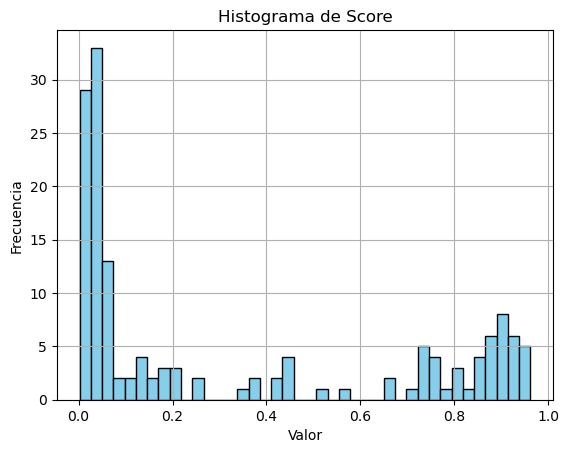

In [5]:
y_pred = clf.predict(X)
y_proba = clf.predict_proba(X)[:, 1]  # Probabilidad para la clase positiva

import numpy as np
import matplotlib.pyplot as plt

# Histograma
plt.hist(y_proba, bins=40, edgecolor='black', color='skyblue')  # Puedes ajustar 'bins' como quieras
plt.title('Histograma de Score')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()